<a href="https://colab.research.google.com/github/plaban1981/Fastai/blob/master/Tuberculosis_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://zindi.africa/competitions/runmila-ai-institute-minohealth-ai-labs-tuberculosis-classification-via-x-rays-challenge/data

Tessellate-Imaging

https://github.com/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/4_image_classification_zoo/Classifier%20-%20Chest%20X-Ray%20based%20Pneumonia%20Classification%20-%20Infected%20Vs%20Normal%20X-rays.ipynb

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


The data have been split into a test and training set. 

* The training set, on which you will train your models, contains 353 images of x-rays of TB-positive lungs and 365 images of x-rays of healthy lungs. 

* The test set contains 82 images.

#### Problem Statement 
You are asked to build a machine learning model to predict the likelihood that the lung in the x-ray is TB-positive. 

In your submission file, **LABEL=1 means the x-ray is TB-positive**. 

**Please keep your values as probabilities**

In [ ]:
import shutil
shutil.move("/content/drive/My Drive/Zindi/Train.csv","/content/drive/My Drive/Zindi/Tuberculosis")
shutil.move("/content/drive/My Drive/Zindi/test_small.zip","/content/drive/My Drive/Zindi/Tuberculosis")
shutil.move("/content/drive/My Drive/Zindi/train_small.zip","/content/drive/My Drive/Zindi/Tuberculosis")
shutil.move("/content/drive/My Drive/Zindi/sample_sub.csv","/content/drive/My Drive/Zindi/Tuberculosis")


'/content/drive/My Drive/Zindi/Tuberculosis/sample_sub.csv'

In [ ]:
shutil.move("/content/drive/My Drive/Zindi/SampleSubmission.csv","/content/drive/My Drive/Zindi/Tuberculosis")

'/content/drive/My Drive/Zindi/Tuberculosis/SampleSubmission.csv'

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd 
from fastai import *
from fastai.vision import *

In [4]:
train = pd.read_csv('/content/drive/My Drive/Zindi/Tuberculosis/Train.csv')
train.head()

filename        ID  LABEL
0  train/VTYNBFTO.png  VTYNBFTO      1
1  train/GVVXXDOZ.png  GVVXXDOZ      0
2  train/PMRSQLXN.png  PMRSQLXN      0
3  train/JXISWDUU.png  JXISWDUU      1
4  train/JVWMAACC.png  JVWMAACC      1

In [5]:
test = pd.read_csv('/content/drive/My Drive/Zindi/Tuberculosis/Test.csv')
test.head()

filename        ID
0  test/GTWSHFYQ.png  GTWSHFYQ
1  test/QTFSSMGD.png  QTFSSMGD
2  test/TBLBHSYT.png  TBLBHSYT
3  test/ZKETEOFG.png  ZKETEOFG
4  test/GKTPBGZP.png  GKTPBGZP

In [6]:
sample = pd.read_csv("/content/drive/My Drive/Zindi/Tuberculosis/SampleSubmission.csv")
sample.head()

ID  LABEL
0  GTWSHFYQ      0
1  QTFSSMGD      0
2  TBLBHSYT      0
3  ZKETEOFG      0
4  GKTPBGZP      0

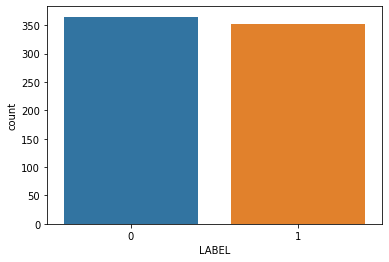

In [7]:
import seaborn as sns
sns.countplot(train['LABEL'])

## The training sample is balanced

In [ ]:
import os
os.mkdir('/content/drive/My Drive/Zindi/Tuberculosis/TRAIN_X_Rays')
os.mkdir('/content/drive/My Drive/Zindi/Tuberculosis/TEST_X_Rays')

In [ ]:
os.mkdir('/content/drive/My Drive/Zindi/Tuberculosis/TRAIN_X_Rays/Positive')
os.mkdir('/content/drive/My Drive/Zindi/Tuberculosis/TRAIN_X_Rays/Negative')

FileExistsError: ignored

In [ ]:
!unzip "/content/drive/My Drive/Zindi/Tuberculosis/train_small.zip" -d "/content/drive/My Drive/Zindi/Tuberculosis"

Archive:  /content/drive/My Drive/Zindi/Tuberculosis/train_small.zip
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/train_small/AANPRUIV.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/train_small/ACEJZINE.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/train_small/ACWCKLLZ.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/train_small/AFWHUNNT.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/train_small/AHHAOLJA.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/train_small/AISHOPWY.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/train_small/AIUNHZIF.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/train_small/AIZUCFFK.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/train_small/AJXXACFA.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/train_small/AJZAGMQH.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/train_small/AKPGJAFY.png  
  inflating: /cont

In [ ]:
!unzip "/content/drive/My Drive/Zindi/Tuberculosis/test_small.zip" -d "/content/drive/My Drive/Zindi/Tuberculosis"

Archive:  /content/drive/My Drive/Zindi/Tuberculosis/test_small.zip
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/test_small/AAKRKIZP.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/test_small/ACPRJNQA.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/test_small/AIJRYHWY.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/test_small/AVXLCBJH.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/test_small/BBWIVFOO.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/test_small/BPMOOTCZ.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/test_small/CGBUGUQW.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/test_small/CHDDLHBE.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/test_small/CIGNXREQ.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/test_small/CMJPTDMO.png  
  inflating: /content/drive/My Drive/Zindi/Tuberculosis/test_small/CQGHATNA.png  
  inflating: /content/drive/My

In [ ]:
train.head()

filename        ID  LABEL
0  train/VTYNBFTO.png  VTYNBFTO      1
1  train/GVVXXDOZ.png  GVVXXDOZ      0
2  train/PMRSQLXN.png  PMRSQLXN      0
3  train/JXISWDUU.png  JXISWDUU      1
4  train/JVWMAACC.png  JVWMAACC      1

# Segregate Train images according to labels

In [ ]:
dest_train_positive = "/content/drive/My Drive/Zindi/Tuberculosis/TRAIN_X_Rays/Positive"
dest_train_negative = "/content/drive/My Drive/Zindi/Tuberculosis/TRAIN_X_Rays/Negative"
src_path = "/content/drive/My Drive/Zindi/Tuberculosis/train_small/"
for filename,label in zip(train['filename'],train['LABEL']):
  file_path = src_path+filename.split("/")[-1]
  if label ==1:
    shutil.move(file_path,dest_train_positive)
  else:
    shutil.move(file_path,dest_train_negative)


# Move Test Images to respective test folder

In [ ]:
dest_test = "/content/drive/My Drive/Zindi/Tuberculosis/TEST_X_Rays"
src_path = "/content/drive/My Drive/Zindi/Tuberculosis/test_small/"
for filename in  test['filename']:
  file_path = src_path+filename.split("/")[-1]
  shutil.move(file_path,dest_test)


In [8]:
path = "/content/drive/My Drive/Zindi/Tuberculosis"


In [17]:
data = ImageDataBunch.from_folder(path,train="TRAIN_X_Rays",
                                  valid="VAL_X_Rays",
                                  test="TEST_X_Rays",
                                  ds_tfms = get_transforms(),
                                  size=224).normalize(imagenet_stats)

In [14]:
get_transforms()

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do

In [15]:
data.show_batch(rows=3,figsize=(12,12))

In [18]:
data

ImageDataBunch;

Train: LabelList (718 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Positive,Positive,Positive,Positive,Positive
Path: /content/drive/My Drive/Zindi/Tuberculosis;

Valid: LabelList (144 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Positive,Positive,Positive,Positive,Positive
Path: /content/drive/My Drive/Zindi/Tuberculosis;

Test: LabelList (82 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/Zindi/Tuberculosis

In [19]:
data.classes

['Negative', 'Positive']

In [20]:
learn = create_cnn(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [21]:
learn.fit_one_cycle(5)

In [23]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [24]:
learn.fit_one_cycle(5,max_lr=slice(1e-3,1e-2))

In [29]:
learn.fit_one_cycle(5,max_lr=slice(1e-3,1e-2),moms=(0.8,0.7))

In [30]:
learn.fit_one_cycle(5,max_lr=slice(1e-3,1e-2/5))

In [31]:
learn.save('learn-1')

In [32]:
learn.fit_one_cycle(5,max_lr=slice(1e-5,1e-2))

In [33]:
preds,y = learn.get_preds(DatasetType.Valid)
print(f"Validation Acuracy :{accuracy(preds,y)}")

Validation Acuracy :0.8958333134651184


In [35]:
learn.save('learn-2')

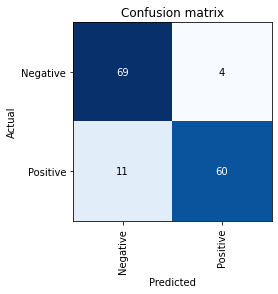

In [36]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [37]:
interp.plot_top_losses(9)

In [38]:
learn.unfreeze()
learn.fit_one_cycle(5)

In [39]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [40]:
preds,y = learn.get_preds(DatasetType.Valid)
print(f"Validation Acuracy after unfreezing :{accuracy(preds,y)}")

Validation Acuracy after unfreezing :0.9166666865348816


In [41]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [42]:
learn.save('unfreeze_resnet34_1')

In [43]:
learn.fit_one_cycle(10,1e-4)

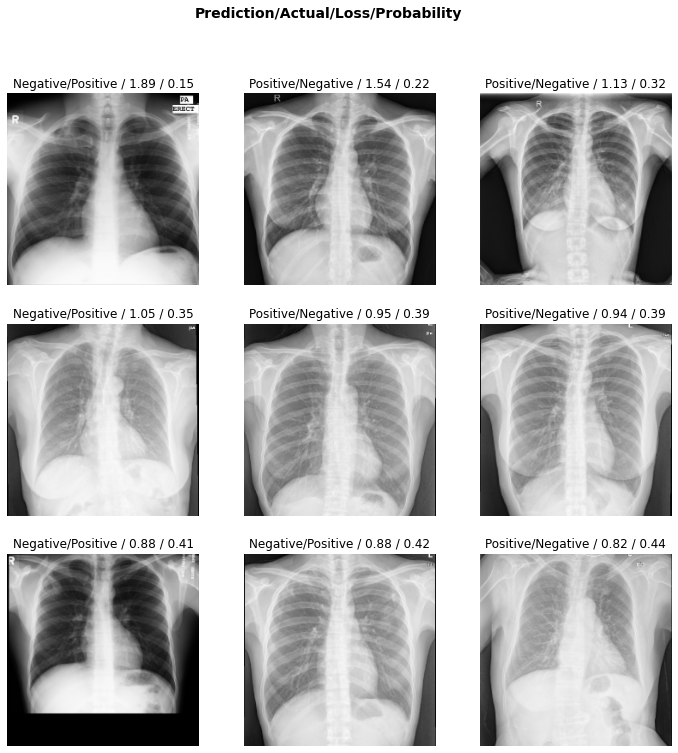

In [44]:
interp.plot_top_losses(9)

In [45]:
preds,y = learn.get_preds(DatasetType.Valid)
print(f"Validation Acuracy after unfreezing :{accuracy(preds,y)}")

Validation Acuracy after unfreezing :0.9722222089767456


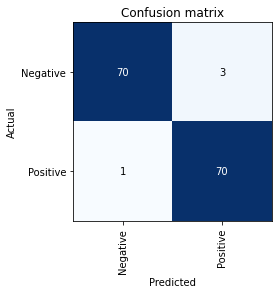

In [46]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Save the model

In [47]:
learn.save('unfreeze_resnet34_2')

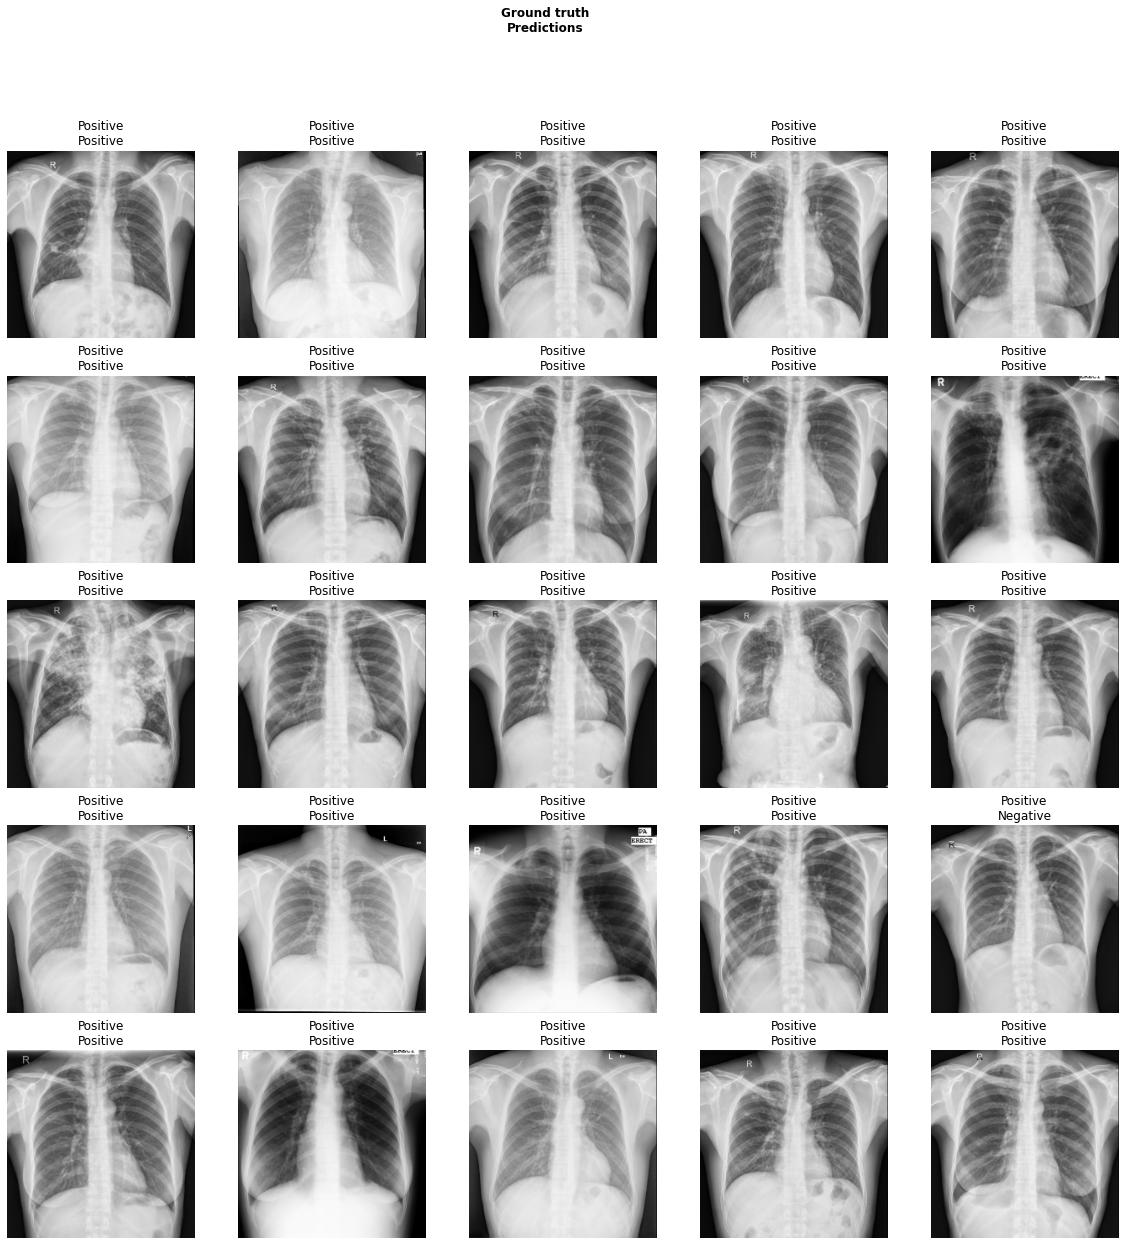

In [48]:
learn.show_results()

In [49]:
learn.fit_one_cycle(10,max_lr=slice(1e-4,1e-4/5))

# Predictions on the test data

In [54]:
data.test_ds

LabelList (82 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/Zindi/Tuberculosis

In [50]:
preds,y = learn.get_preds(DatasetType.Test)

In [51]:
sample.head()

ID  LABEL
0  GTWSHFYQ      0
1  QTFSSMGD      0
2  TBLBHSYT      0
3  ZKETEOFG      0
4  GKTPBGZP      0

In [55]:
test.head()

filename        ID
0  test/GTWSHFYQ.png  GTWSHFYQ
1  test/QTFSSMGD.png  QTFSSMGD
2  test/TBLBHSYT.png  TBLBHSYT
3  test/ZKETEOFG.png  ZKETEOFG
4  test/GKTPBGZP.png  GKTPBGZP

In [52]:
label = [pred.argmax().item() for pred in preds]

In [56]:
test['LABEL'] = label

In [57]:
combined = pd.merge(sample,test,how='left',on='ID')
combined.head()

ID  LABEL_x           filename  LABEL_y
0  GTWSHFYQ        0  test/GTWSHFYQ.png        0
1  QTFSSMGD        0  test/QTFSSMGD.png        0
2  TBLBHSYT        0  test/TBLBHSYT.png        1
3  ZKETEOFG        0  test/ZKETEOFG.png        1
4  GKTPBGZP        0  test/GKTPBGZP.png        1

In [58]:
final = combined[['ID','LABEL_y']].copy()

In [59]:
final = final.rename(columns={'LABEL_y':'LABEL'})

In [60]:
final.head()

ID  LABEL
0  GTWSHFYQ      0
1  QTFSSMGD      0
2  TBLBHSYT      1
3  ZKETEOFG      1
4  GKTPBGZP      1

In [61]:
final.shape

(82, 2)

In [62]:
final.isnull().sum()

ID       0
LABEL    0
dtype: int64

In [63]:
final.to_csv('sub2.csv',index=False)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


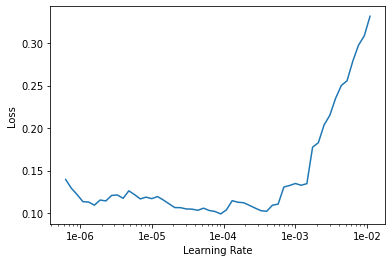

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
test[['ID','LABEL']].to_csv('fastai.csv',index=False)

In [ ]:
learn.fit_one_cycle(10,max_lr=slice(1e-5,1e-4/5))

In [ ]:
preds,y = learn.get_preds(DatasetType.Valid)
print(f"Validation Acuracy after unfreezing :{accuracy(preds,y)}")

Validation Acuracy after unfreezing :0.9436619877815247


In [ ]:
learn.fit_one_cycle(5,max_lr=0.001,moms=(0.8,0.7))

In [ ]:
learn.fit_one_cycle(5,max_lr=0.0001)

In [ ]:
learn.fit_one_cycle(5,max_lr=0.0001)

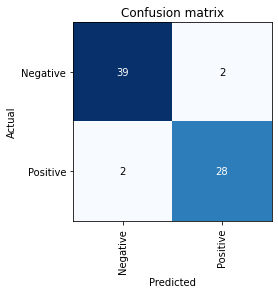

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## Create CNN

In [ ]:
help(res_block)

Help on function res_block in module fastai.layers:

res_block(nf, dense:bool=False, norm_type:Union[fastai.layers.NormType, NoneType]=<NormType.Batch: 1>, bottle:bool=False, **conv_kwargs)
    Resnet block of `nf` features. `conv_kwargs` are passed to `conv_layer`.



In [ ]:
data = ImageDataBunch.from_folder(path,train="TRAIN_X_Rays",
                                  valid_pct=0.10,
                                  test="TEST_X_Rays",
                                  ds_tfms = get_transforms(),
                                  size=224).normalize()

In [ ]:
data

ImageDataBunch;

Train: LabelList (647 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Positive,Positive,Positive,Positive,Positive
Path: /content/drive/My Drive/Zindi/Tuberculosis;

Valid: LabelList (71 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Negative,Positive,Positive,Positive,Negative
Path: /content/drive/My Drive/Zindi/Tuberculosis;

Test: LabelList (82 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/Zindi/Tuberculosis

In [ ]:
x,y = data.train_ds[0]

Positive


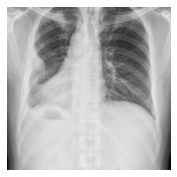

In [ ]:
x.show()
print(y)

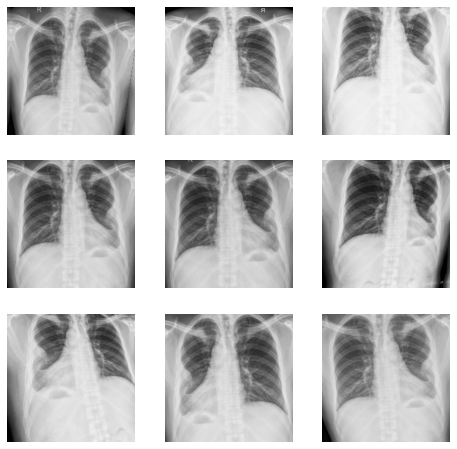

In [ ]:
def _plot(i,j,ax): data.train_ds[0][0].show(ax, cmap='gray')
plot_multi(_plot, 3, 3, figsize=(8,8))

In [ ]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [ ]:
xb = xb.cuda()

In [ ]:
model(xb).shape

torch.Size([64, 98])

In [ ]:
learn.lr_find(end_lr=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


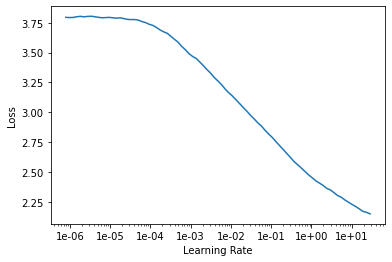

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(3, max_lr=0.1)

In [ ]:
def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

In [ ]:
def conv2(ni,nf): return conv_layer(ni,nf,stride=2)

In [ ]:
model = nn.Sequential(
    conv2(3, 8),
    res_block(8),
    conv2(8, 16),
    res_block(16),
    conv2(16, 32),
    res_block(32),
    conv2(32, 16),
    res_block(16),
    conv2(16, 10),
    Flatten()
)

In [ ]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [ ]:
learn.fit_one_cycle(10, max_lr=0.1)

In [ ]:
class ResBlock(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv1 = conv_layer(nf,nf)
        self.conv2 = conv_layer(nf,nf)
        
    def forward(self, x): return x + self.conv2(self.conv1(x))

In [ ]:
def conv2(ni,nf): return conv_layer(ni,nf,stride=2)

In [ ]:
model = nn.Sequential(
    conv2(3, 8),
    res_block(8),
    conv2(8, 16),
    res_block(16),
    conv2(16, 32),
    res_block(32),
    conv2(32, 16),
    res_block(16),
    conv2(16, 2),
    Flatten()
)

In [ ]:
def conv_and_res(ni,nf): return nn.Sequential(conv2(ni, nf), res_block(nf))

In [ ]:
model = nn.Sequential(
    conv_and_res(3, 8),
    conv_and_res(8, 16),
    conv_and_res(16, 32),
    conv_and_res(32, 16),
    conv2(16, 2),
    Flatten()
)

In [ ]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


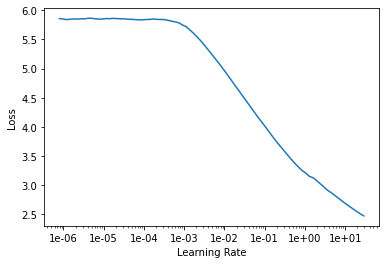

In [ ]:
learn.lr_find(end_lr=100)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(12, max_lr=0.005)

In [ ]:
learn.fit_one_cycle(15, max_lr=0.01)

In [ ]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 112, 112]        216        True      
______________________________________________________________________
ReLU                 [8, 112, 112]        0          False     
______________________________________________________________________
BatchNorm2d          [8, 112, 112]        16         True      
______________________________________________________________________
Conv2d               [8, 112, 112]        576        True      
______________________________________________________________________
ReLU                 [8, 112, 112]        0          False     
______________________________________________________________________
BatchNorm2d          [8, 112, 112]        16         True      
______________________________________________________________________
Conv2d               [8, 112, 112]        576        True      
___________________________________________________

## Apply Nasnetlarge using Keras

#### Import Required Library

In [83]:
from tensorflow.keras.layers import Input,Dense,Flatten,Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [84]:
import tensorflow as tf

# Implement callback function to stop training
# when accuracy reaches ACCURACY_THRESHOLD
ACCURACY_THRESHOLD = 0.990

class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('val_accuracy') >= ACCURACY_THRESHOLD):
			print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
			self.model.stop_training = True

# Instantiate a callback object
callbacks = myCallback()

# Nasnet Large

In [ ]:
base_pretrained_model = NASNetLarge(input_shape =  (331, 331, 3), include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False

343613440/343610240 [==============================] - 10s 0us/step


## Resnet152

In [68]:
base_pretrained_model = ResNet152(input_shape =  (224, 224, 3), include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False

234700800/234698864 [==============================] - 3s 0us/step


## Resnet152V2

In [85]:
base_pretrained_model = ResNet152V2(input_shape =  (224, 224, 3), include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False

234553344/234545216 [==============================] - 3s 0us/step


In [86]:
base_pretrained_model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [87]:
model = Sequential()
model.add(base_pretrained_model )
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [70]:
model = Sequential()
model.add(base_pretrained_model )
model.add(Dense(256, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 7, 7, 2048)        58370944  
_________________________________________________________________
dense (Dense)                (None, 7, 7, 256)         524544    
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 12545     
Total params: 58,908,033
Trainable params: 537,089
Non-trainable params: 58,370,944
_________________________________________________________________


In [100]:
from keras import backend as K
def recall_m(y_true,y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred,0,1)))
  possible_positives = K.sum(K.round(K.clip(y_true,0,1)))
  recalls = true_positives / (possible_positives + K.epsilon())
  return recalls

def precision_m(y_true,y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred,0,1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred,0,1)))
  precisions = true_positives / (predicted_positives + K.epsilon())
  return precisions

def f1_m(y_true,y_pred):
  precision = precision_m(y_true,y_pred)
  recall = recall_m(y_true,y_pred)
  return 2*(precision * recall) /(precision + recall + K.epsilon())




In [123]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

In [72]:
train.head()

filename        ID  LABEL
0  train/VTYNBFTO.png  VTYNBFTO      1
1  train/GVVXXDOZ.png  GVVXXDOZ      0
2  train/PMRSQLXN.png  PMRSQLXN      0
3  train/JXISWDUU.png  JXISWDUU      1
4  train/JVWMAACC.png  JVWMAACC      1

In [73]:
X  = train[['filename','LABEL']].copy()

In [74]:
X.head()

filename  LABEL
0  train/VTYNBFTO.png      1
1  train/GVVXXDOZ.png      0
2  train/PMRSQLXN.png      0
3  train/JXISWDUU.png      1
4  train/JVWMAACC.png      1

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into train/test = 80%/20%
x = X['filename'].values
y = X['LABEL'].values
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify= y,random_state=42)

In [ ]:
os.mkdir("/content/drive/My Drive/Zindi/Tuberculosis/VAL_X_Rays")
os.mkdir("/content/drive/My Drive/Zindi/Tuberculosis/VAL_X_Rays/Positive")
os.mkdir("/content/drive/My Drive/Zindi/Tuberculosis/VAL_X_Rays/Negative")

In [ ]:
X_test[0]

'train/TNYUHXLL.png'

In [ ]:
dest_val_positive = "/content/drive/My Drive/Zindi/Tuberculosis/VAL_X_Rays/Positive"
dest_val_negative = "/content/drive/My Drive/Zindi/Tuberculosis/VAL_X_Rays/Negative"
src_path_pos = "/content/drive/My Drive/Zindi/Tuberculosis/TRAIN_X_Rays/Positive/"
src_path_neg = "/content/drive/My Drive/Zindi/Tuberculosis/TRAIN_X_Rays/Negative/"
for filename,label in zip(X_test,y_test):
  
  if label ==1:
    file_path = src_path_pos +filename.split("/")[-1]
    shutil.copy(file_path,dest_val_positive)
  else:
    file_path = src_path_neg +filename.split("/")[-1]
    shutil.copy(file_path,dest_val_negative)

NameError: ignored

## Image Augmentation

In [115]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = '/content/drive/My Drive/Zindi/Tuberculosis/TRAIN_X_Rays'
validation_dir = '/content/drive/My Drive/Zindi/Tuberculosis/VAL_X_Rays'
test_dir = '/content/drive/My Drive/Zindi/Tuberculosis/TEST_X_Rays'
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,#40
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## Initialize Imagenet Subtraction in RGB order

In [116]:
import numpy as np
mean = np.array([123.68,116.779,103.939],dtype='float32')
train_datagen.mean = mean
validation_datagen.mean = mean
test_datagen.mean = mean

# Determine total number of images

In [117]:
from imutils import paths

In [118]:
total_train = len(list(paths.list_images(train_dir)))
total_val = len(list(paths.list_images(validation_dir)))
total_test = len(list(paths.list_images(test_dir)))

In [119]:
total_train,total_val,total_test

(718, 144, 82)

In [120]:
batch_size= 8
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=batch_size,
                                                    color_mode="rgb",
                                                    class_mode='binary',
                                                    shuffle=True)
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(224,224),
                                                              batch_size=batch_size,
                                                              color_mode="rgb",
                                                              class_mode='binary',
                                                              shuffle=False)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224,224),
                                                  color_mode="rgb",
                                                  batch_size=batch_size,
                                                  shuffle=False)

Found 718 images belonging to 2 classes.
Found 144 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


* parameters steps_per_epoch and validation_steps need to be equal to the total number of data points divided to the batch_size.


* As of TensorFlow2.1, fit_generator is being deprecated. You can use .fit() method also on generators.

In [122]:
total_val/batch_size

18.0

In [124]:
history = model.fit(train_generator,
                    steps_per_epoch=int(total_train/batch_size),
                    epochs=25,
                    validation_data=validation_generator,
                    validation_steps=int(total_val/batch_size))

Epoch 1/25
89/89 [==============================] - 25s 285ms/step - loss: 1.5506 - accuracy: 0.6268 - val_loss: 0.5696 - val_accuracy: 0.7708
Epoch 2/25
89/89 [==============================] - 23s 256ms/step - loss: 1.2169 - accuracy: 0.6634 - val_loss: 0.4706 - val_accuracy: 0.8056
Epoch 3/25
89/89 [==============================] - 23s 256ms/step - loss: 0.8250 - accuracy: 0.7211 - val_loss: 0.5928 - val_accuracy: 0.6875
Epoch 4/25
89/89 [==============================] - 23s 256ms/step - loss: 0.6325 - accuracy: 0.7211 - val_loss: 0.5071 - val_accuracy: 0.7569
Epoch 5/25
89/89 [==============================] - 23s 256ms/step - loss: 0.6002 - accuracy: 0.7282 - val_loss: 0.5130 - val_accuracy: 0.7431
Epoch 6/25
89/89 [==============================] - 23s 256ms/step - loss: 0.5448 - accuracy: 0.7563 - val_loss: 0.5100 - val_accuracy: 0.7847
Epoch 7/25
89/89 [==============================] - 23s 256ms/step - loss: 0.5765 - accuracy: 0.7310 - val_loss: 0.5112 - val_accuracy: 0.7431

## Fine Tune ResNet152V2

In [128]:
model = Sequential()
model.add(base_pretrained_model )
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [138]:
base_pretrained_model = ResNet152V2(input_shape =  (224, 224, 3), include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False
for layers in base_pretrained_model.layers:
  if layers.name.startswith("conv5"):
    layers.trainable = True

model = Sequential()
model.add(base_pretrained_model )
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

In [139]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

## Reduce Learing rate on Plateau

In [147]:
from datetime import datetime
import os
logdir = os.path.join('logs_',datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=2,min_lr=1e-6)
callbacks = [reduce_lr,tensorboard_callback]

In [140]:
history = model.fit(train_generator,
                    steps_per_epoch=int(total_train/batch_size),
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=int(total_val/batch_size))

Epoch 1/30
89/89 [==============================] - 26s 296ms/step - loss: 0.9371 - accuracy: 0.6507 - val_loss: 0.5620 - val_accuracy: 0.6944
Epoch 2/30
89/89 [==============================] - 23s 263ms/step - loss: 0.7770 - accuracy: 0.6831 - val_loss: 0.6263 - val_accuracy: 0.7014
Epoch 3/30
89/89 [==============================] - 23s 263ms/step - loss: 0.7222 - accuracy: 0.7099 - val_loss: 0.6452 - val_accuracy: 0.7083
Epoch 4/30
89/89 [==============================] - 23s 262ms/step - loss: 0.6899 - accuracy: 0.7169 - val_loss: 0.4711 - val_accuracy: 0.7500
Epoch 5/30
89/89 [==============================] - 23s 262ms/step - loss: 0.6471 - accuracy: 0.7254 - val_loss: 0.5839 - val_accuracy: 0.7083
Epoch 6/30
89/89 [==============================] - 23s 261ms/step - loss: 0.6327 - accuracy: 0.7099 - val_loss: 0.5054 - val_accuracy: 0.7708
Epoch 7/30
89/89 [==============================] - 23s 260ms/step - loss: 0.6085 - accuracy: 0.7310 - val_loss: 0.5184 - val_accuracy: 0.7708

Here Accuracy has increased to 86%

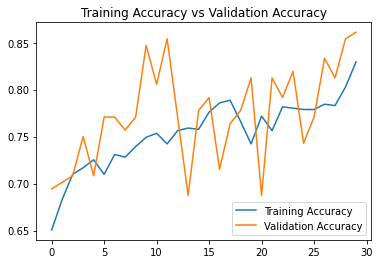

In [142]:
import matplotlib.pyplot as plt
N = 25

plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('Training Accuracy vs Validation Accuracy')
plt.show()

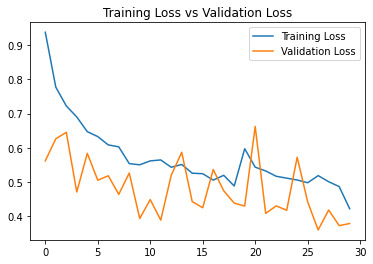

In [144]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Training Loss vs Validation Loss')
plt.show()

In [148]:
history = model.fit(train_generator,
                    steps_per_epoch=int(total_train/batch_size),
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=int(total_val/batch_size),
                    callbacks= callbacks)

Epoch 1/30
 1/89 [..............................] - ETA: 0s - loss: 0.9998 - accuracy: 0.5000WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
89/89 [==============================] - 36s 404ms/step - loss: 0.5230 - accuracy: 0.7662 - val_loss: 0.3772 - val_accuracy: 0.8611
Epoch 2/30
89/89 [==============================] - 36s 402ms/step - loss: 0.4839 - accuracy: 0.7831 - val_loss: 0.4400 - val_accuracy: 0.7986
Epoch 3/30
89/89 [==============================] - 36s 404ms/step - loss: 0.4788 - accuracy: 0.8014 - val_loss: 0.5633 - val_accuracy: 0.6944
Epoch 4/30
89/89 [==============================] - 36s 402ms/step - loss: 0.4575 - accuracy: 0.7803 - val_loss: 0.4236 - val_accuracy: 0.8194
Epoch 5/30
89/89 [==============================] - 36s 404ms/step -

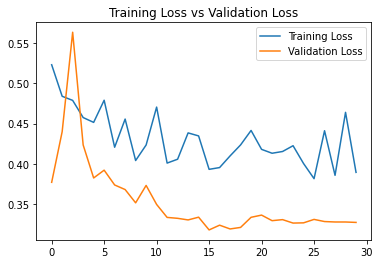

In [149]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Training Loss vs Validation Loss')
plt.show()

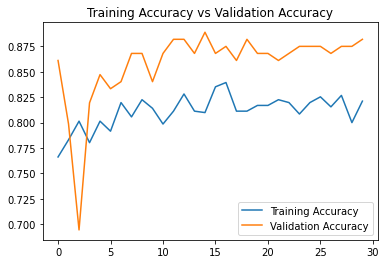

In [150]:
import matplotlib.pyplot as plt
N = 25

plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('Training Accuracy vs Validation Accuracy')
plt.show()

In [151]:
history = model.fit(train_generator,
                    steps_per_epoch=int(total_train/batch_size),
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=int(total_val/batch_size),
                    callbacks= callbacks)

Epoch 1/50
89/89 [==============================] - 36s 406ms/step - loss: 0.4017 - accuracy: 0.8239 - val_loss: 0.3274 - val_accuracy: 0.8750
Epoch 2/50
89/89 [==============================] - 36s 402ms/step - loss: 0.3894 - accuracy: 0.8239 - val_loss: 0.3293 - val_accuracy: 0.8750
Epoch 3/50
89/89 [==============================] - 36s 399ms/step - loss: 0.4325 - accuracy: 0.8211 - val_loss: 0.3262 - val_accuracy: 0.8750
Epoch 4/50
89/89 [==============================] - 36s 400ms/step - loss: 0.4353 - accuracy: 0.8127 - val_loss: 0.3281 - val_accuracy: 0.8750
Epoch 5/50
89/89 [==============================] - 36s 400ms/step - loss: 0.4462 - accuracy: 0.8099 - val_loss: 0.3273 - val_accuracy: 0.8819
Epoch 6/50
89/89 [==============================] - 36s 401ms/step - loss: 0.4237 - accuracy: 0.8183 - val_loss: 0.3252 - val_accuracy: 0.8750
Epoch 7/50
89/89 [==============================] - 36s 409ms/step - loss: 0.4173 - accuracy: 0.8352 - val_loss: 0.3264 - val_accuracy: 0.8681

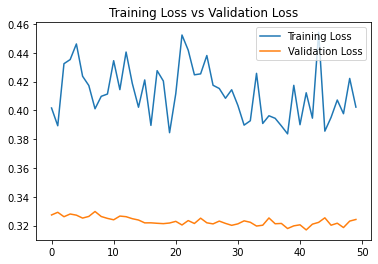

In [152]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Training Loss vs Validation Loss')
plt.show()

In [158]:
test.head()

filename        ID  LABEL
0  test/GTWSHFYQ.png  GTWSHFYQ      0
1  test/QTFSSMGD.png  QTFSSMGD      0
2  test/TBLBHSYT.png  TBLBHSYT      1
3  test/ZKETEOFG.png  ZKETEOFG      1
4  test/GKTPBGZP.png  GKTPBGZP      1

In [159]:
test_dir

'/content/drive/My Drive/Zindi/Tuberculosis/TEST_X_Rays'

In [164]:
import cv2
import PIL
from keras.preprocessing import image
imgtst = test['ID'].values
test_img_tensor = []
for image_name in imgtst :
  img = image.load_img(test_dir+"/"+image_name+".png",target_size=(224,224))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor,axis=0)
  img_tensor /=255.
  test_img_tensor.append(img_tensor[0])
test_images = np.array(test_img_tensor)
test_images.shape

(82, 224, 224, 3)

In [165]:
predictions = model.predict(test_images)

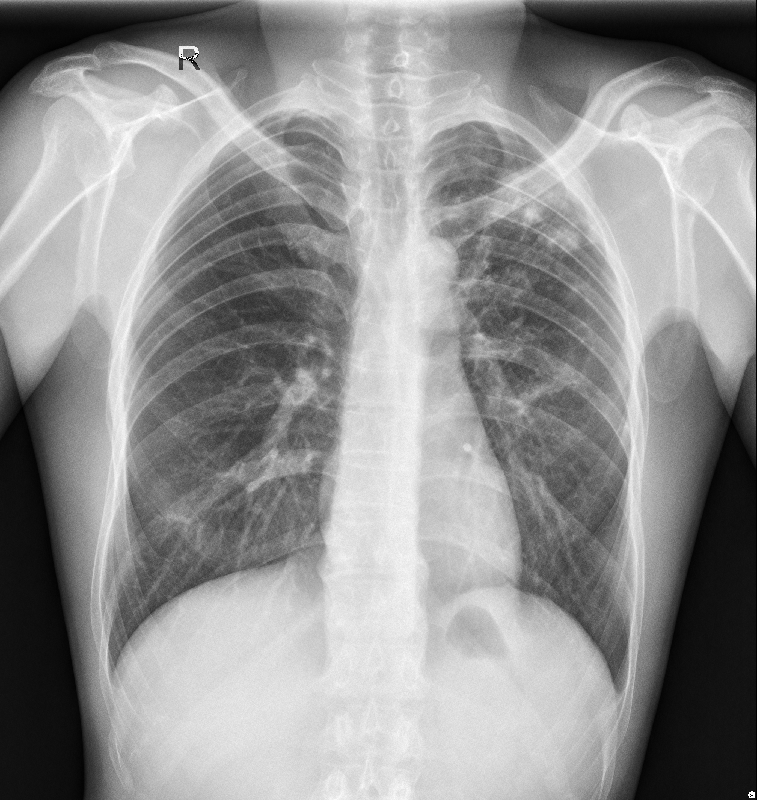

In [166]:
PIL.Image.open('/content/drive/My Drive/Zindi/Tuberculosis/TEST_X_Rays/AAKRKIZP.png')

In [176]:
preds = [0 if p< 0.5 else 1 for p in predictions]

In [177]:
predictions[0],preds[0]

(array([0.119063], dtype=float32), 0)

In [168]:
keras_df = test[['ID']]
samp = sample[['ID']]

In [178]:
keras_df['LABEL'] = preds
final1 = pd.merge(samp,keras_df,how='left',on='ID')

In [179]:
final1.head()

ID  LABEL
0  GTWSHFYQ      0
1  QTFSSMGD      0
2  TBLBHSYT      1
3  ZKETEOFG      0
4  GKTPBGZP      1

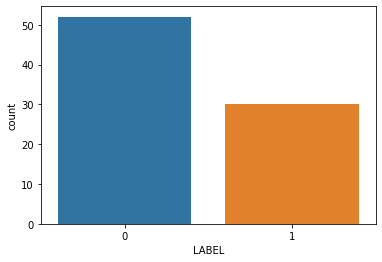

In [180]:
import seaborn as sns
sns.countplot(final1['LABEL'])

In [182]:
final1.to_csv('resnet150v2.csv',index=False)

#### Zindi Accuracy Scores - 77%

In [171]:
final.head()

ID  LABEL
0  GTWSHFYQ      0
1  QTFSSMGD      0
2  TBLBHSYT      1
3  ZKETEOFG      1
4  GKTPBGZP      1

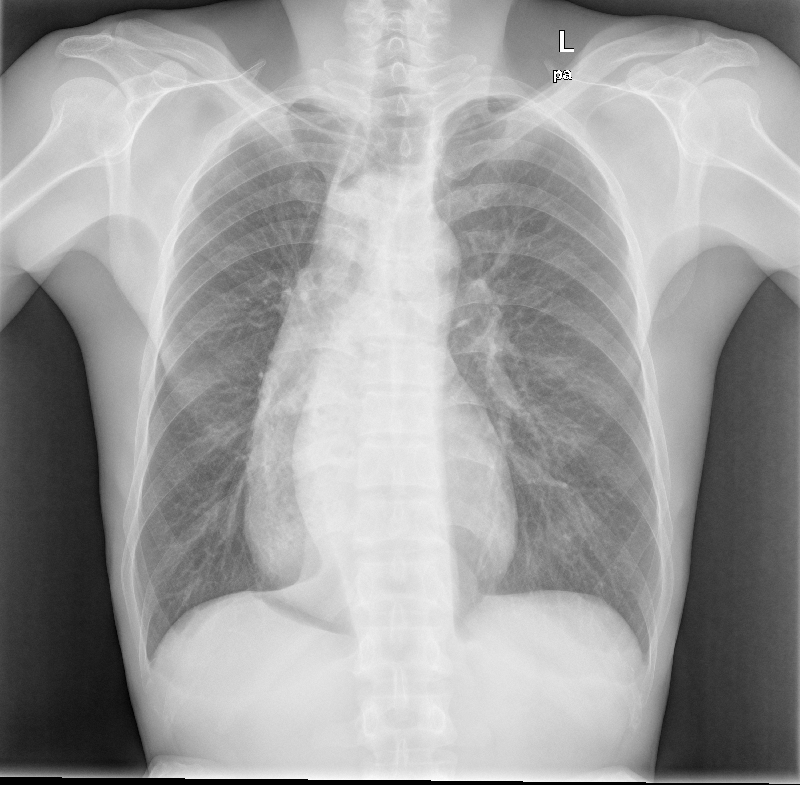

In [172]:
PIL.Image.open('/content/drive/My Drive/Zindi/Tuberculosis/TEST_X_Rays/GKTPBGZP.png')

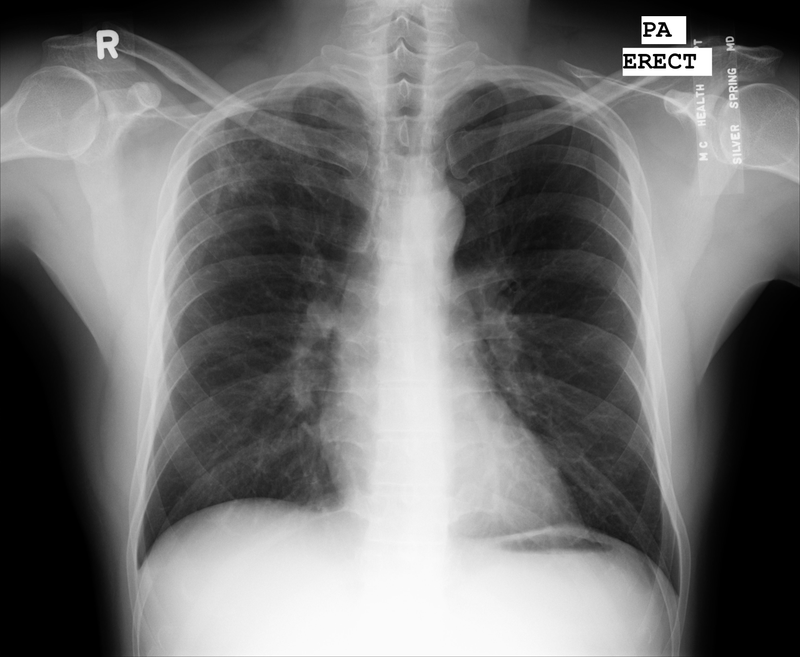

In [181]:
PIL.Image.open('/content/drive/My Drive/Zindi/Tuberculosis/TEST_X_Rays/ZKETEOFG.png')

# Randomly visualize predictions

In [183]:
np.random.randint(0,len(sample))

43

In [ ]:
rand_imge_index = [np.random.randint(0,len(sample)) for i in range(5) ]
labels_dict = {0 :'Not Affected by Covid',1:{'Covid Affected'}}
plt.figure(figsize = (20, 12))
plt.subplot(1,5,1)
plt.imshow(test_images[0])
plt.title('LABEL '+str(labels_dict[0]))
plt.subplot(1,5,2)
plt.imshow(test_images[100])
plt.title('LABEL '+str(train_label[100]))
plt.subplot(1,5,3)
plt.imshow(train_dataset[10])
plt.title('LABEL '+str(train_label[10]))
plt.subplot(1,5,4)
plt.imshow(train_dataset[20])
plt.title('LABEL '+str(train_label[20]))
plt.subplot(1,5,5)
plt.imshow(train_dataset[25])
plt.title('LABEL '+str(train_label[25]))

## Reshape training images an array of shape(64,64) with 3 channels and generate labels for each corresponding image

In [ ]:
folder_images = os.listdir(img_path)
for i, image_name in enumerate(folder_images):
  if image_name in img_name:
    image = cv2.imread(img_path+"/"+image_name)
    #print(image_name)
    #break
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    image = image.resize((224,224))
    train_dataset.append(np.array(image))
    train_label.append(train_img[train_img['image_names']== image_name]['emergency_or_not'].values.tolist()[0])
